In [3]:
#using Pkg
#Pkg.update()
#Pkg.add(PackageSpec(name="JWAS",rev="master"))

In [ ]:
#methods(add_genotypes)

In [1]:
using DataFrames              # package for working with data sets
using JWAS                    # package for Bayesian regression analyses, including BayesB and BayesCπ        
#using JWAS:misc               # utility functions
using JWAS.Datasets
using Distributions       
using Plots                   # package for plotting 
using CSV
using LinearAlgebra,Statistics,Random,DelimitedFiles, DataFrames

In [4]:
#Pkg.status("JWAS")

    Status `/opt/julia/environments/v1.1/Project.toml`
  [c9a035f4] JWAS v0.5.5 #master (https://github.com/reworkhow/JWAS.jl.git)


In [2]:
phenotypes = CSV.read("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/production_1_7_Exp_0.75_Complete.dat", types=Dict(:ID => String), delim = ' ',header=true, missingstrings=["NA"])
first(phenotypes,10)

,ID,Cycle,BatchNum,Batch,Company,SowID,NurEnrich,QNurPenBatch,NurPenBatch
,String,Int64,Int64,String,String,String,String,String,String⍰
1,0001,1,1,1B,A,1B_1715,FALSE,1B_D04,1B_D04
2,0002,1,1,1B,A,1B_1642,FALSE,1B_D04,1B_D04
3,0004,1,1,1B,A,1B_2150,FALSE,1B_D04,1B_D04
4,0005,1,1,1B,A,1B_1980,FALSE,1B_D04,1B_D04
5,0006,1,1,1B,A,1B_1902,FALSE,1B_D04,1B_D04
6,0007,1,1,1B,A,1B_2150,FALSE,1B_D04,1B_D04
7,0009,1,1,1B,A,1B_1902,FALSE,1B_D02,1B_D02
8,0010,1,1,1B,A,1B_1885,FALSE,1B_D02,1B_D02
9,0011,1,1,1B,A,1B_2097,FALSE,1B_D02,1B_D02


┌ Warning: `T` is deprecated, use `nonmissingtype` instead.
│   caller = compacttype(::Type, ::Int64) at show.jl:39
└ @ DataFrames /opt/julia/packages/DataFrames/XuYBH/src/abstractdataframe/show.jl:39


In [3]:
phenotypes= dropmissing(phenotypes, :NurPenBatch)
phenotypes= dropmissing(phenotypes, :FinPenBatch)
#first(phenotypes,10)

,ID,Cycle,BatchNum,Batch,Company,SowID,NurEnrich,QNurPenBatch,NurPenBatch
,String,Int64,Int64,String,String,String,String,String,String
1,0001,1,1,1B,A,1B_1715,FALSE,1B_D04,1B_D04
2,0002,1,1,1B,A,1B_1642,FALSE,1B_D04,1B_D04
3,0004,1,1,1B,A,1B_2150,FALSE,1B_D04,1B_D04
4,0005,1,1,1B,A,1B_1980,FALSE,1B_D04,1B_D04
5,0007,1,1,1B,A,1B_2150,FALSE,1B_D04,1B_D04
6,0009,1,1,1B,A,1B_1902,FALSE,1B_D02,1B_D02
7,0010,1,1,1B,A,1B_1885,FALSE,1B_D02,1B_D02
8,0011,1,1,1B,A,1B_2097,FALSE,1B_D02,1B_D02
9,0012,1,1,1B,A,1B_1902,FALSE,1B_D02,1B_D02


In [2]:
function readMatBin(fileName)
    genStr = open(fileName)
    n = read(genStr,Int64)
    p = read(genStr,Int64)
    M = zeros(n,p)
    for j in 1:p
        for i in 1:n
            M[i,j] = read(genStr,Float64)
        end
    end
    close(genStr)
    return M
end
@time M = readMatBin("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ALGP2_Cycle_1_7_Geno_Complete_Impute_JWAS.bin.gen.bin")

 18.497829 seconds (37.77 k allocations: 10.393 GiB, 0.10% gc time)


3205×435172 Array{Float64,2}:
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  2.0  2.0  0.0  1.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  0.0  1.0  1.0  0.0  1.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 1.0  1.0  0.0  1.0  2.0  0.0  0.0  2.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [41]:
model_equations = "Nur2ADG = intercept + Batch + Died + EntryAge + NurPenBatch + SowID
             nTrtsPer180 = intercept + Batch + Died + EntryAge + FinPenBatch";
R= [0.116010E-01 -0.362014E-01
    -0.362014E-01 1.44296]
model=build_model(model_equations,R);
set_covariate(model,"EntryAge")
Gpen1=0.109876E-02
set_random(model,"NurPenBatch", Gpen1)
Gpen2=0.866396E-01
set_random(model,"FinPenBatch", Gpen2)
G2=0.818600E-03
set_random(model,"SowID",G2)

NurPenBatch is not found in model equation 2.
FinPenBatch is not found in model equation 1.
SowID is not found in model equation 2.


In [10]:
rowID = vec(readdlm("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ALGP2_Cycle_1_7_Geno_Complete_Impute_JWAS.bin.ids.txt",String))

3205-element Array{String,1}:
 "0001"
 "0002"
 "0004"
 "0005"
 "0006"
 "0007"
 "0009"
 "0010"
 "0011"
 "0012"
 "0013"
 "0014"
 "0015"
 ⋮     
 "3283"
 "3284"
 "3285"
 "3286"
 "3287"
 "3288"
 "3289"
 "3290"
 "3291"
 "3292"
 "3293"
 "3294"

In [42]:
G3=[0.302601E-02  0
0  0.145770]
@time add_genotypes(model,M,G3,header=true, rowID=rowID, G_is_marker_variance=false) # no method matching
#@time add_genotypes(model,"Geno_JWAS_impute.txt",G3,separator=' ', G_is_marker_variance=true)

The header (marker IDs) is set to 1,2,...,#markers
435172 markers on 3205 individuals were added.
  8.005530 seconds (870.68 k allocations: 20.848 GiB, 17.34% gc time)


## Bayes CPi

In [ ]:
@time outCPi=runMCMC(model,phenotypes,methods="BayesC", missing_phenotypes=true, estimatePi=true,Pi=Dict([1.0; 1.0]=>0.001,[1.0; 0.0]=>0.001,[0.0; 1.0]=>0.001,[0.0; 0.0]=>0.998), estimateScale=true,chain_length=50000,burnin = 5000,output_heritability=true, output_samples_frequency=100, output_samples_file="MCMC_BayesCPi")

In [ ]:
keys(outCPi)

In [ ]:
h2=CSV.read("MCMC_BayesCPi_heritability.txt",delim = ',',header=true)
insertcols!(h2, 1, :iteration => 1:500) # Add a column called iteration
first(h2, 10)

In [135]:
mean(h2[!,2])

0.25234333679710863

In [ ]:
using Plots
x = h2[!,1]; y = h2[!,2]; # These are the plotting data
plot(x,y, title = "h2 trace plot",
        xlabel = "iteration", ylabel = "h2")

In [ ]:
using Plots
x = h2[!,1]; y = h2[!,3]; # These are the plotting data
plot(x,y, title = "h2 trace plot",
        xlabel = "iteration", ylabel = "h2")

In [ ]:
@time Nur2ADG_outCPi,winVarProps = GWAS("MCMC_BayesCPi_marker_effects_Nur2ADG.txt","/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ChrInfo_map_1_7_Complete_JWAS.txt",model;header=true,window_size="1 Mb",threshold=0.001,output_winVarProps=true)

In [ ]:
@time CarcassWt_outCPi,winVarProps = GWAS("MCMC_BayesCPi_marker_effects_CarcassWt.txt","/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ChrInfo_map_1_7_Complete_JWAS.txt",model;header=true,window_size="1 Mb",threshold=0.001,output_winVarProps=true)

In [ ]:
Nur2ADG_outCPi

In [ ]:
sort(Nur2ADG_outCPi, :prGenVar, rev=true)

In [ ]:
sort(CarcassWt_outCPi, :prGenVar, rev=true)

In [143]:
CSV.write("MCMC_BayesCPi_1Mb_window_VarProps_Nur2ADG.txt", Nur2ADG_outCPi)

"MCMC_BayesCPi_1Mb_window_VarProps_Nur2ADG.txt"

In [144]:
CSV.write("MCMC_BayesCPi_1Mb_window_VarProps_CarcassWt.txt", CarcassWt_outCPi)

"MCMC_BayesCPi_1Mb_window_VarProps_CarcassWt.txt"

## BayesB

In [43]:
@time outB=runMCMC(model,phenotypes,methods="BayesB", missing_phenotypes=true, estimatePi=false,Pi=Dict([1.0; 1.0]=>0.001,[1.0; 0.0]=>0.001,[0.0; 1.0]=>0.001,[0.0; 0.0]=>0.998), estimateScale=true,chain_length=50000,burnin = 5000,output_heritability=true, output_samples_frequency=100, output_samples_file="MCMC_BayesB")

Checking phenotypes...
Individual IDs (strings) are provided in the first column of the phenotypic data.
Phenotypes for all traits included in the model for individual 1746 in the row 1521 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 1788 in the row 1559 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 2327 in the row 1985 are missing. This record is deleted.

The prior for marker effects covariance matrix is calculated from genetic covariance matrix and Π.
The mean of the prior for the marker effects covariance matrix is:
 9.0e-6  0.0     
 0.0     0.000437



A Linear Mixed Model was build using model equations:

Nur2ADG = intercept + Batch + Died + EntryAge + NurPenBatch + SowID
nTrtsPer180 = intercept + Batch + Died + EntryAge + FinPenBatch

Model Information:

Term            C/F          F/R            nLevels
intercept       factor       fixed                1
Batch         

running MCMC for BayesB...100%|█████████████████████████| Time: 3 days, 11:28:09




The version of Julia and Platform in use:

Julia Version 1.1.0
Commit 80516ca202 (2019-01-21 21:24 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Core(TM) i7-5960X CPU @ 3.00GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-6.0.1 (ORCJIT, haswell)
Environment:
  JULIA_DEPOT_PATH = /opt/julia
  JULIA_PKGDIR = /opt/julia
  JULIA_VERSION = 1.1.0


The analysis has finished. Results are saved in the returned variable and text files. MCMC samples are saved in text files.


300511.851151 seconds (1.99 T allocations: 134.073 TiB, 26.00% gc time)


Dict{Any,Any} with 9 entries:
  "marker effects"          => 870344×5 DataFrame. Omitted printing of 1 column…
  "EBV_Nur2ADG"             => 3205×3 DataFrame…
  "heritability"            => 2×3 DataFrame…
  "location parameters"     => 1892×5 DataFrame…
  "residual variance"       => 4×3 DataFrame…
  "ScaleEffectVar"          => 4×3 DataFrame…
  "genetic_variance"        => 4×3 DataFrame…
  "EBV_nTrtsPer180"         => 3205×3 DataFrame…
  "marker effects variance" => 4×3 DataFrame…

In [44]:
keys(outB)

Base.KeySet for a Dict{Any,Any} with 9 entries. Keys:
  "marker effects"
  "EBV_Nur2ADG"
  "heritability"
  "location parameters"
  "residual variance"
  "ScaleEffectVar"
  "genetic_variance"
  "EBV_nTrtsPer180"
  "marker effects variance"

In [45]:
h2=CSV.read("MCMC_BayesB_heritability.txt",delim = ',',header=true)
insertcols!(h2, 1, :iteration => 1:500) # Add a column called iteration
first(h2, 10)

,iteration,Nur2ADG,nTrtsPer180
,Int64,Float64,Float64
1,1,0.205816,0.0743796
2,2,0.211776,0.0879077
3,3,0.200651,0.0844842
4,4,0.212028,0.0907424
5,5,0.217361,0.0962539
6,6,0.206886,0.0991447
7,7,0.188716,0.0697266
8,8,0.18609,0.0814415
9,9,0.213441,0.0901721


In [47]:
mean(h2[!,3])

0.08789894311684966

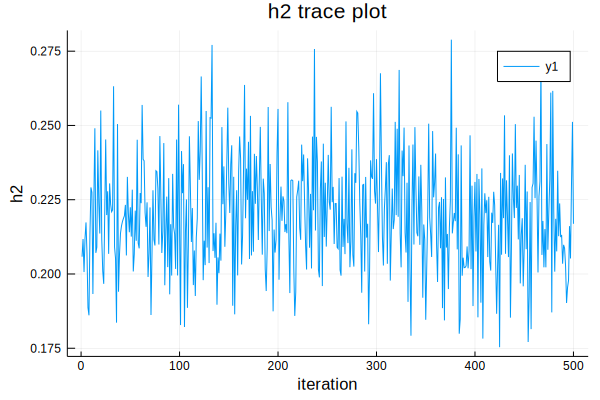

In [48]:
using Plots
x = h2[!,1]; y = h2[!,2]; # These are the plotting data
plot(x,y, title = "h2 trace plot",
        xlabel = "iteration", ylabel = "h2")

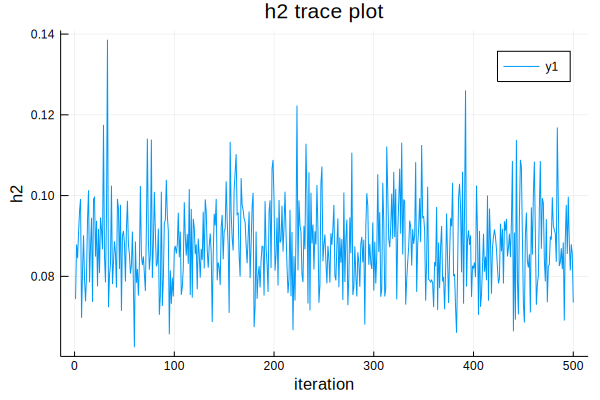

In [49]:
using Plots
x = h2[!,1]; y = h2[!,3]; # These are the plotting data
plot(x,y, title = "h2 trace plot",
        xlabel = "iteration", ylabel = "h2")

In [50]:
@time Nur2ADG_outB,winVarProps = GWAS("MCMC_BayesB_marker_effects_Nur2ADG.txt",
    "/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ChrInfo_map_1_7_Complete_JWAS.txt",
    model;header=true,window_size="1 Mb",threshold=0.001,output_winVarProps=true)

Compute the posterior probability of association of the genomic window that explains more than 0.001 of the total genetic variance.
1801.585873 seconds (688.66 M allocations: 5.126 TiB, 41.47% gc time)


(2398×10 DataFrame. Omitted printing of 4 columns
│ Row  │ window │ chr    │ wStart    │ wEnd      │ start_SNP │ end_SNP   │
│      │ Int64  │ String │ Int64     │ Int64     │ Int64     │ Int64     │
├──────┼────────┼────────┼───────────┼───────────┼───────────┼───────────┤
│ 1    │ 990    │ 7      │ 22000000  │ 23000000  │ 22003711  │ 22970603  │
│ 2    │ 991    │ 7      │ 23000000  │ 24000000  │ 23001142  │ 23999710  │
│ 3    │ 1300   │ 9      │ 71000000  │ 72000000  │ 71001828  │ 71999660  │
│ 4    │ 578    │ 4      │ 17000000  │ 18000000  │ 17002855  │ 17998425  │
│ 5    │ 992    │ 7      │ 24000000  │ 25000000  │ 24003441  │ 24993022  │
│ 6    │ 557    │ 3      │ 129000000 │ 130000000 │ 129000890 │ 129998184 │
│ 7    │ 556    │ 3      │ 128000000 │ 129000000 │ 128003120 │ 128997476 │
│ 8    │ 439    │ 3      │ 11000000  │ 12000000  │ 11001814  │ 11999563  │
│ 9    │ 1353   │ 9      │ 124000000 │ 125000000 │ 124010697 │ 124991294 │
│ 10   │ 1934   │ 15     │ 2000000   │ 3000000   │

In [51]:
@time nTrtsPer180_outB,winVarProps = GWAS("MCMC_BayesB_marker_effects_nTrtsPer180.txt","/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ChrInfo_map_1_7_Complete_JWAS.txt",model;header=true,window_size="1 Mb",threshold=0.001,output_winVarProps=true)

Compute the posterior probability of association of the genomic window that explains more than 0.001 of the total genetic variance.
1815.492959 seconds (680.44 M allocations: 5.126 TiB, 42.18% gc time)


(2398×10 DataFrame. Omitted printing of 4 columns
│ Row  │ window │ chr    │ wStart    │ wEnd      │ start_SNP │ end_SNP   │
│      │ Int64  │ String │ Int64     │ Int64     │ Int64     │ Int64     │
├──────┼────────┼────────┼───────────┼───────────┼───────────┼───────────┤
│ 1    │ 991    │ 7      │ 23000000  │ 24000000  │ 23001142  │ 23999710  │
│ 2    │ 1813   │ 14     │ 23000000  │ 24000000  │ 23001988  │ 23996549  │
│ 3    │ 990    │ 7      │ 22000000  │ 23000000  │ 22003711  │ 22970603  │
│ 4    │ 557    │ 3      │ 129000000 │ 130000000 │ 129000890 │ 129998184 │
│ 5    │ 996    │ 7      │ 28000000  │ 29000000  │ 28000991  │ 28999976  │
│ 6    │ 994    │ 7      │ 26000000  │ 27000000  │ 26007598  │ 26997638  │
│ 7    │ 1300   │ 9      │ 71000000  │ 72000000  │ 71001828  │ 71999660  │
│ 8    │ 34     │ 1      │ 33000000  │ 34000000  │ 33002217  │ 33999771  │
│ 9    │ 556    │ 3      │ 128000000 │ 129000000 │ 128003120 │ 128997476 │
│ 10   │ 1576   │ 12     │ 57000000  │ 58000000  │

In [52]:
sort(Nur2ADG_outB, :prGenVar, rev=true)

,window,chr,wStart,wEnd,start_SNP,end_SNP,numSNP,prGenVar,WPPA
,Int64,String,Int64,Int64,Int64,Int64,Int64,Float64,Float64
1,990,7,22000000,23000000,22003711,22970603,188,4.42,0.826
2,991,7,23000000,24000000,23001142,23999710,243,4.04,0.816
3,992,7,24000000,25000000,24003441,24993022,142,1.65,0.492
4,578,4,17000000,18000000,17002855,17998425,215,0.96,0.53
5,1300,9,71000000,72000000,71001828,71999660,225,0.82,0.578
6,557,3,129000000,130000000,129000890,129998184,225,0.77,0.45
7,556,3,128000000,129000000,128003120,128997476,230,0.67,0.442
8,988,7,20000000,21000000,20001975,20995550,217,0.34,0.216
9,1353,9,124000000,125000000,124010697,124991294,215,0.31,0.37


In [53]:
sort(nTrtsPer180_outB, :prGenVar, rev=true)

,window,chr,wStart,wEnd,start_SNP,end_SNP,numSNP,prGenVar,WPPA
,Int64,String,Int64,Int64,Int64,Int64,Int64,Float64,Float64
1,991,7,23000000,24000000,23001142,23999710,243,2.34,0.738
2,1813,14,23000000,24000000,23001988,23996549,246,1.63,0.576
3,990,7,22000000,23000000,22003711,22970603,188,1.14,0.56
4,557,3,129000000,130000000,129000890,129998184,225,0.47,0.37
5,1221,8,131000000,132000000,131003752,131999439,262,0.35,0.256
6,996,7,28000000,29000000,28000991,28999976,234,0.31,0.32
7,556,3,128000000,129000000,128003120,128997476,230,0.3,0.278
8,1576,12,57000000,58000000,57001278,57996214,282,0.26,0.27
9,1442,11,3000000,4000000,3001510,3999891,208,0.26,0.21


In [54]:
CSV.write("MCMC_BayesB_1Mb_window_VarProps_Nur2ADG.txt", Nur2ADG_outB)

"MCMC_BayesB_1Mb_window_VarProps_Nur2ADG.txt"

In [55]:
CSV.write("MCMC_BayesB_1Mb_window_VarProps_nTrtsPer180.txt", nTrtsPer180_outB)

"MCMC_BayesB_1Mb_window_VarProps_nTrtsPer180.txt"

## BV correlation for MHC region from MCMC BayesB samples

In [8]:
SNP_Effect_ADG= readdlm("MCMC_BayesB_marker_effects_Nur2ADG.txt", ',',header=false)
SNP_Effect_ADG= SNP_Effect_ADG[2:501,:]

500×435172 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0 

In [9]:
# Get marker effects for MHC region 21 to 25mb
Effect_ADG_MHC= SNP_Effect_ADG[:, 185429:186439]  # obtained from Map info

500×1011 Array{Float64,2}:
  0.0         0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0         0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0         0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0         0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0         0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0         0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 -0.00352802  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0         0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0         0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0         0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0         0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0         0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0         0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
  ⋮                          ⋱       ⋮                        ⋮  
  0.0         0.0  0.0  0.0     0.0  0.0  0.0  0.

In [10]:
# Get genotypes for MHC region
M_MHC= M[:, 185429:186439]
M_MHC'

1011×3205 Adjoint{Float64,Array{Float64,2}}:
 1.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  …  2.0  0.0  0.0  1.0  1.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0     1.0  0.0  0.0  0.0  1.0  0.0  0.0
 1.0  0.0  1.0  1.0  1.0  0.0  1.0  1.0     2.0  0.0  0.0  1.0  1.0  0.0  1.0
 1.0  2.0  1.0  1.0  1.0  2.0  1.0  1.0     1.0  2.0  2.0  1.0  2.0  2.0  1.0
 1.0  2.0  1.0  1.0  2.0  2.0  1.0  1.0     2.0  2.0  2.0  2.0  2.0  2.0  2.0
 2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  …  1.0  2.0  2.0  2.0  1.0  2.0  2.0
 0.0  1.0  1.0  2.0  1.0  2.0  0.0  2.0     1.0  2.0  2.0  2.0  1.0  2.0  1.0
 2.0  2.0  1.0  2.0  1.0  2.0  2.0  2.0     1.0  2.0  2.0  1.0  2.0  2.0  1.0
 1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0     1.0  0.0  0.0  0.0  1.0  0.0  0.0
 2.0  2.0  2.0  2.0  1.0  2.0  2.0  2.0     1.0  2.0  2.0  1.0  2.0  2.0  1.0
 2.0  2.0  1.0  1.0  2.0  1.0  2.0  1.0  …  2.0  1.0  0.0  2.0  1.0  0.0  2.0
 1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0     1.0  0.0  0.0  0.0  1.0  0.0  0.0
 2.0  2.0  2.0  2.0

In [11]:
BV_ADG_MHC= Effect_ADG_MHC * M_MHC'

500×3205 Array{Float64,2}:
 -0.0164202   -0.036189    -0.0395376   …  -0.036189     0.000332797
 -0.0342064   -0.058663    -0.0485425      -0.0609255   -0.0303013  
 -0.0445551   -0.0559988   -0.0450326      -0.0559988   -0.0166376  
 -0.016871    -0.0250332    0.00435492     -0.014299     0.013854   
 -0.04243     -0.0673795   -0.0535691      -0.0673795   -0.0286196  
  0.0956844    0.0508725    0.0207891   …   0.0108479    0.0409313  
  0.047527     0.0483656    0.0129996       0.0108955    0.0223723  
  0.0264645   -0.0154199   -0.0339842      -0.00353177   0.00124265 
 -0.00034873  -0.0239796   -0.0381195      -0.0362112   -0.00607011 
 -0.0123971   -0.0298423   -0.0354558      -0.031471    -0.0123971  
 -0.0236802   -0.0669372   -0.0760324   …  -0.0733864   -0.0284668  
 -0.0173457   -0.0346913   -0.0346913      -0.0346913   -0.0173457  
 -0.0295971   -0.0517127   -0.0386955      -0.0403998   -0.0129467  
  ⋮                                     ⋱                           
 -0.002

In [12]:
var_ADG= vec(var(BV_ADG_MHC, dims=2))  # Get var for each iteration

500-element Array{Float64,1}:
 0.0002780450958807223 
 0.0002292828882861521 
 0.0003907626140602752 
 0.00029899634530316496
 0.0003119857792384471 
 0.0006149537709063297 
 0.00014511758857043891
 0.00031209446463893677
 0.00025999766475868385
 0.00012835049454562087
 0.0003916758562452467 
 0.00010472454998787581
 0.00036649559338455535
 ⋮                     
 6.88216765834686e-5   
 0.00022945741200394113
 0.00016437134277592585
 0.00021536435441347988
 0.0003365853365614022 
 0.0003698946636752235 
 0.00015667019009267205
 0.0004938537377408489 
 0.0003517784526755349 
 0.0003153307405303632 
 0.0004065986983639655 
 0.0001790941711563134 

In [13]:
# Get var for AllTRT
SNP_Effect_AllTRT= readdlm("MCMC_BayesB_marker_effects_nTrtsPer180.txt", ',',header=false)
SNP_Effect_AllTRT= SNP_Effect_AllTRT[2:501,:]
# Get marker effects for MHC region 20 to 30mb
Effect_AllTRT_MHC= SNP_Effect_AllTRT[:, 185429:186439]
BV_AllTRT_MHC= Effect_AllTRT_MHC * M_MHC'

500×3205 Array{Float64,2}:
  0.0694407    0.0694407    0.0        …   0.0         0.0694407   0.0       
  0.144107     0.27906      0.219054       0.213364    0.228313    0.109527  
  0.129599     0.190645     0.122092       0.0630212   0.246781   -0.0541603 
  0.0335429    0.0335429   -0.0389398     -0.0271286   0.0606715  -0.0542571 
  0.0720162    0.144032     0.144032       0.144032    0.144032    0.0720162 
 -0.242517    -0.189178    -0.170745   …  -0.170745   -0.061281   -0.10741   
 -0.0443816   -0.0735348   -0.0414123     -0.0443816  -0.0122591  -0.0122591 
 -0.15276     -0.083438     0.0           -0.0822964  -0.0929874  -0.083438  
 -0.0375224    0.00217159   0.0207713      0.0421885   0.0421885   0.00249453
  0.190382     0.297404     0.258474       0.307284    0.311662    0.190382  
  0.126368     0.293425     0.294879   …   0.271529    0.274632    0.136844  
  0.110488     0.220977     0.220977       0.220977    0.220977    0.110488  
  0.0862152    0.152385     0.20101  

In [14]:
var_AllTRT= vec(var(BV_AllTRT_MHC, dims=2)) # Get var for each iteration

500-element Array{Float64,1}:
 0.002289492643799167  
 0.0047396912007635515 
 0.016003779978920683  
 0.003363230162414947  
 0.0018310843400025068 
 0.004195230513327566  
 0.0013514735743299447 
 0.0019488402923188246 
 0.00043557288520257407
 0.0044726215093789535 
 0.00430522227077667   
 0.004249132970496     
 0.0030746696648157    
 ⋮                     
 0.0013329695435805495 
 0.0015645496465980983 
 0.0023639889701114664 
 0.0050360445053087574 
 0.007141301225594922  
 0.0011092136999284509 
 0.0036776987266644162 
 0.017668910863041783  
 0.00039938401152049313
 0.005335607358143309  
 0.005623823008199278  
 0.0022571317702753287 

In [15]:
coVar = Array{Float64,1}()
for i=1:500
    adg= BV_ADG_MHC[i,:]
    AllTRT= BV_AllTRT_MHC[i,:]
    covi=cov(adg, AllTRT)
    push!(coVar,covi)
end
coVar

500-element Array{Float64,1}:
 -0.0005088746018996819 
 -0.0009219972482829955 
 -0.0021518919144986673 
 -0.0009469224747455651 
 -0.0005958704274345134 
 -0.0012705457054547433 
 -0.00028495914894654807
 -0.0005367641069621569 
 -0.00024912240703911693
 -0.000692290883531514  
 -0.001129716762636053  
 -0.0006670746121490841 
 -0.0009160255519453672 
  ⋮                     
 -0.00024053610676634844
 -0.00030269009097142916
 -0.0005529449517715545 
 -0.0008396462092746058 
 -0.0011837977541854653 
 -0.00032179253227839367
  3.932759251885387e-5  
 -0.0026997658466279603 
  7.947037153779308e-5  
 -0.0010357997172592583 
 -0.0008332062484656143 
 -0.00052524018225888   

In [16]:
out=DataFrame(covar=coVar)
insertcols!(out, 1, :var_ADG => var_ADG)
insertcols!(out, 1, :var_AllTRT => var_AllTRT)
insertcols!(out, 1, :iteration => 1:500) # Add a column called iteration

,iteration,var_AllTRT,var_ADG,covar
,Int64,Float64,Float64,Float64
1,1,0.00228949,0.000278045,-0.000508875
2,2,0.00473969,0.000229283,-0.000921997
3,3,0.0160038,0.000390763,-0.00215189
4,4,0.00336323,0.000298996,-0.000946922
5,5,0.00183108,0.000311986,-0.00059587
6,6,0.00419523,0.000614954,-0.00127055
7,7,0.00135147,0.000145118,-0.000284959
8,8,0.00194884,0.000312094,-0.000536764
9,9,0.000435573,0.000259998,-0.000249122


In [17]:
# genetic correlation
Product= out[!,:var_AllTRT] .* out[!,:var_ADG]  # product of vars
sqVar=[sqrt(i) for i in Product]  # get sqrt for whole vector
rg= out[!,:covar] ./ sqVar[:,]  # Genetic correlations
insertcols!(out, 2, :corr => rg)

,iteration,corr,var_AllTRT,var_ADG,covar
,Int64,Float64,Float64,Float64,Float64
1,1,-0.637799,0.00228949,0.000278045,-0.000508875
2,2,-0.884441,0.00473969,0.000229283,-0.000921997
3,3,-0.860504,0.0160038,0.000390763,-0.00215189
4,4,-0.944285,0.00336323,0.000298996,-0.000946922
5,5,-0.78837,0.00183108,0.000311986,-0.00059587
6,6,-0.791027,0.00419523,0.000614954,-0.00127055
7,7,-0.643456,0.00135147,0.000145118,-0.000284959
8,8,-0.68826,0.00194884,0.000312094,-0.000536764
9,9,-0.740283,0.000435573,0.000259998,-0.000249122


In [18]:
CSV.write("BayesB_MHC_BV_Var.txt", out)

"BayesB_MHC_BV_Var.txt"

In [19]:
out= filter(row -> ! isnan(row.corr), out)
mean(out[!,:corr])

-0.702519059988346

In [20]:
using Statistics
std(out[!,:corr])

0.27355000030601045

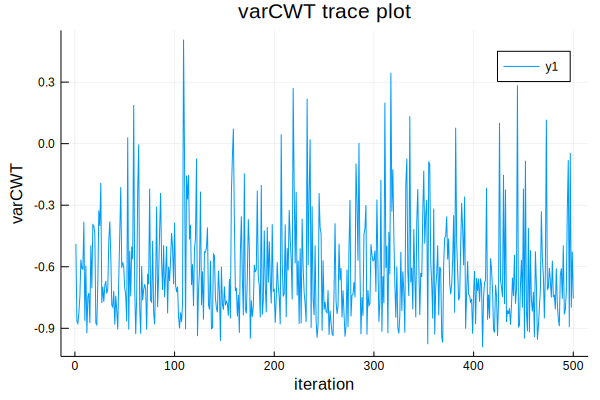

In [68]:
using Plots
x = out[!,1]; y = out[!,2]; # These are the plotting data
plot(x,y, title = "varCWT trace plot",
        xlabel = "iteration", ylabel = "varCWT")

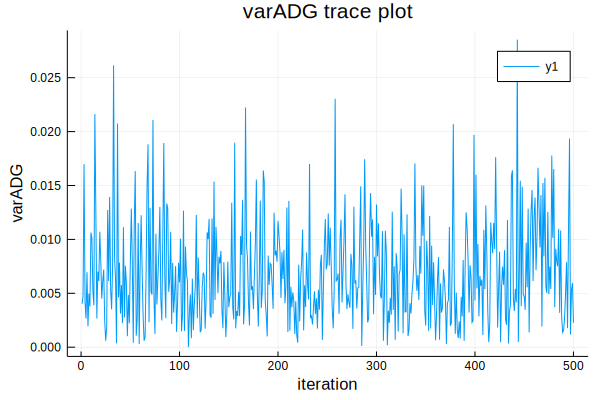

In [69]:
using Plots
x = out[!,1]; y = out[!,3]; # These are the plotting data
plot(x,y, title = "varADG trace plot",
        xlabel = "iteration", ylabel = "varADG")

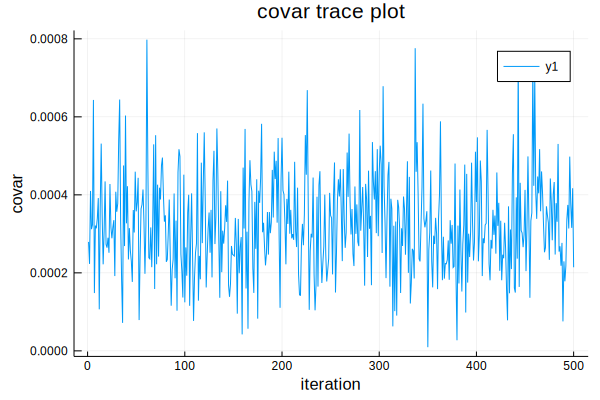

In [70]:
using Plots
x = out[!,1]; y = out[!,4]; # These are the plotting data
plot(x,y, title = "covar trace plot",
        xlabel = "iteration", ylabel = "covar")

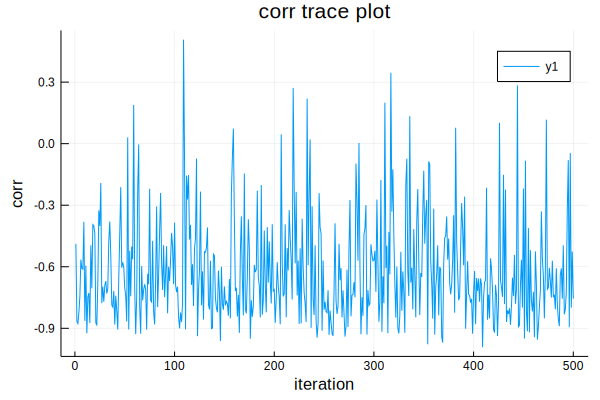

In [71]:
using Plots
x = out[!,1]; y = out[!,2]; # These are the plotting data
plot(x,y, title = "corr trace plot",
        xlabel = "iteration", ylabel = "corr")

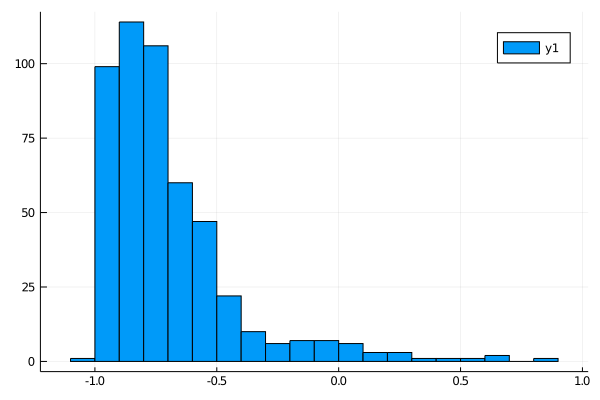

In [21]:
h = histogram(out[!,2])
display(h)

## Whole genome genetic correlation

In [3]:
gVar= CSV.read("MCMC_BayesB_genetic_variance.txt")

,Nur2ADG_Nur2ADG,Nur2ADG_nTrtsPer180,nTrtsPer180_Nur2ADG,nTrtsPer180_nTrtsPer180
,Float64,Float64,Float64,Float64
1,0.00276889,-0.000653929,-0.000653929,0.115595
2,0.00320115,-0.00314818,-0.00314818,0.139345
3,0.00297405,-0.0010744,-0.0010744,0.132931
4,0.00311863,-0.00305534,-0.00305534,0.138687
5,0.00308544,-0.00196015,-0.00196015,0.154399
6,0.00290481,-0.0012392,-0.0012392,0.159303
7,0.00268397,-0.00197672,-0.00197672,0.109637
8,0.00246122,-0.00274876,-0.00274876,0.130865
9,0.00283979,-0.0018023,-0.0018023,0.146038


In [4]:
sqVar1=[sqrt(i) for i in gVar[!,:Nur2ADG_Nur2ADG]] 
sqVar2=[sqrt(i) for i in gVar[!,:nTrtsPer180_nTrtsPer180]] 
Product= sqVar1 .* sqVar2
rg= gVar[!,:Nur2ADG_nTrtsPer180] ./ Product  # Genetic correlations
insertcols!(gVar, 2, :corr => rg)

,Nur2ADG_Nur2ADG,corr,Nur2ADG_nTrtsPer180,nTrtsPer180_Nur2ADG,nTrtsPer180_nTrtsPer180
,Float64,Float64,Float64,Float64,Float64
1,0.00276889,-0.0365518,-0.000653929,-0.000653929,0.115595
2,0.00320115,-0.14906,-0.00314818,-0.00314818,0.139345
3,0.00297405,-0.0540355,-0.0010744,-0.0010744,0.132931
4,0.00311863,-0.146913,-0.00305534,-0.00305534,0.138687
5,0.00308544,-0.0898066,-0.00196015,-0.00196015,0.154399
6,0.00290481,-0.0576062,-0.0012392,-0.0012392,0.159303
7,0.00268397,-0.115233,-0.00197672,-0.00197672,0.109637
8,0.00246122,-0.153162,-0.00274876,-0.00274876,0.130865
9,0.00283979,-0.0885018,-0.0018023,-0.0018023,0.146038


In [5]:
#using Pkg
#Pkg.add("StatsBase")
#using(StatsBase)
mean(gVar[!,2])

-0.11676738784759383

In [6]:
using Statistics
std(gVar[!,:corr])

0.061672181286280846

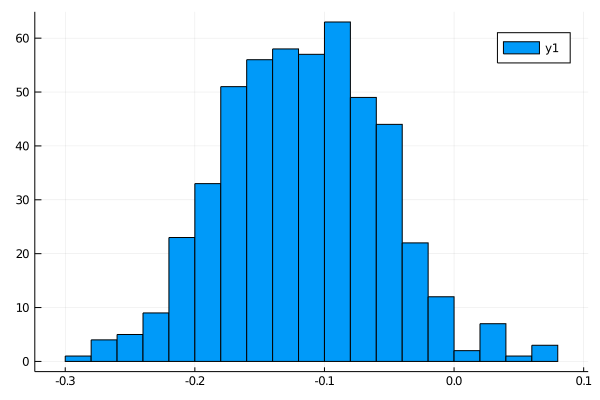

In [5]:
h = histogram(gVar[!,2])
display(h)

## BV correlation for SSC3 region from MCMC BayesB samples

In [4]:
SNP_Effect_ADG= readdlm("MCMC_BayesB_marker_effects_Nur2ADG.txt", ',',header=false)
SNP_Effect_ADG= SNP_Effect_ADG[2:451,:]
# Get marker effects for MHC region 20 to 30mb
Effect_ADG_MHC= SNP_Effect_ADG[:, 102313:103184]  # obtained from Map info
# Get genotypes for MHC region
M_MHC= M[:, 102313:103184]
M_MHC'
BV_ADG_MHC= Effect_ADG_MHC * M_MHC'
var_ADG= vec(var(BV_ADG_MHC, dims=2))  # Get var for each iteration

# Get var for AllTRT
SNP_Effect_AllTRT= readdlm("MCMC_BayesB_marker_effects_nTrtsPer180.txt", ',',header=false)
SNP_Effect_AllTRT= SNP_Effect_AllTRT[2:451,:]
# Get marker effects for MHC region 20 to 30mb
Effect_AllTRT_MHC= SNP_Effect_AllTRT[:, 102313:103184]
BV_AllTRT_MHC= Effect_AllTRT_MHC * M_MHC'
var_AllTRT= vec(var(BV_AllTRT_MHC, dims=2)) # Get var for each iteration

coVar = Array{Float64,1}()
for i=1:450
    adg= BV_ADG_MHC[i,:]
    AllTRT= BV_AllTRT_MHC[i,:]
    covi=cov(adg, AllTRT)
    push!(coVar,covi)
end
coVar

out=DataFrame(covar=coVar)
insertcols!(out, 1, :var_ADG => var_ADG)
insertcols!(out, 1, :var_AllTRT => var_AllTRT)
insertcols!(out, 1, :iteration => 1:450) # Add a column called iteration

# genetic correlation
Product= out[!,:var_AllTRT] .* out[!,:var_ADG]  # product of vars
sqVar=[sqrt(i) for i in Product]  # get sqrt for whole vector
rg= out[!,:covar] ./ sqVar[:,]  # Genetic correlations
insertcols!(out, 2, :corr => rg)

,iteration,corr,var_AllTRT,var_ADG,covar
,Int64,Float64,Float64,Float64,Float64
1,1,-0.933176,0.000305377,1.40525e-5,-6.11305e-5
2,2,-0.32941,2.98134e-5,0.000128355,-2.03775e-5
3,3,0.531833,7.39781e-5,1.29363e-5,1.64525e-5
4,4,1.0,9.85681e-5,4.74343e-5,6.83777e-5
5,5,-0.377575,0.000627992,6.2695e-6,-2.36917e-5
6,6,-0.793597,0.000267537,7.33696e-6,-3.51601e-5
7,7,0.194029,0.000159976,1.67345e-5,1.00392e-5
8,8,0.197424,9.829e-6,1.05259e-5,2.0081e-6
9,9,1.0,4.1843e-7,9.04418e-6,1.94534e-6


In [5]:
out= filter(row -> ! isnan(row.corr), out)
mean(out[!,:corr])

-0.42566473976403585

In [6]:
using Statistics
std(out[!,:corr])

0.561266294262862

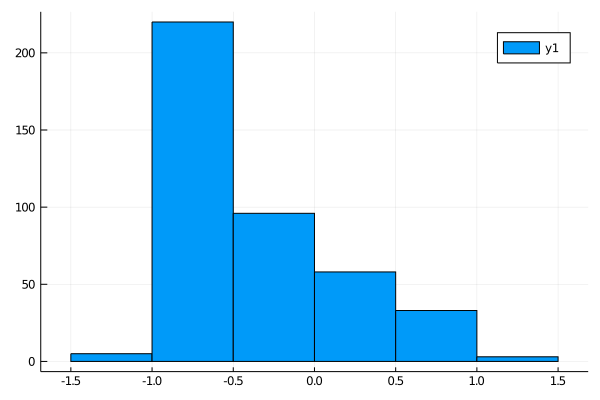

In [7]:
using Plots
h = histogram(out[!,:corr])
display(h)